In [1]:
!pip install opendatasets
import opendatasets as od
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
datasetlink = "https://www.kaggle.com/datasets/rohan0301/unsupervised-learning-on-country-data"
od.download(datasetlink)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: kidkeozz
Your Kaggle Key: ··········


100%|██████████| 5.21k/5.21k [00:00<00:00, 6.88MB/s]

In [3]:
os.chdir("unsupervised-learning-on-country-data")
os.listdir()

['data-dictionary.csv', 'Country-data.csv']

In [4]:
archivo = 'Country-data.csv'
df = pd.read_csv(archivo)
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [5]:
df.shape

(167, 10)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [7]:
df['country'].value_counts().sum()

167

In [8]:
df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [9]:
df_num = df.select_dtypes(include=['number'])
df_cat = df.select_dtypes(include=['object'])

#Matriz de correlación
Gracias a esta matriz de correlación podemos empezar a notar algunos patrones o características que se correlacionan, como por ejemplo la expectativa de vida tiene correlación alta con el ingreso y a su vez con el GDPP que es el PIB que es algo que tiene que ver bastante con los ingresos de una persona, entre otras muchas más que iremos analizando.

<Axes: >

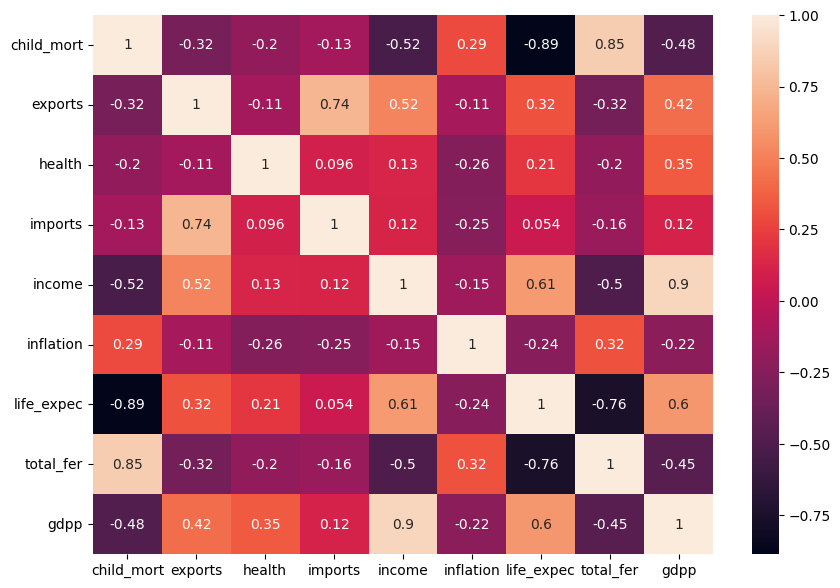

In [10]:
plt.figure(figsize=(10,7))
matrix = df_num.corr()
sns.heatmap(matrix, annot = True)

#Comparación entre la Fecundidad Materna y la Mortalidad Infantil
Podemos ver que hay una relación en cuanto a los bebes que podria tener una madre y la mortalidad infantil, esto se puede deber a muchas causas, pero como casi siempre la principal es el dinero, ya que en paises donde el ingreso no es muy alto es dificil mantener a varios niños, pero sin embargo la que encuentro como la causa más razonable puede ser la falta de educación sexual.

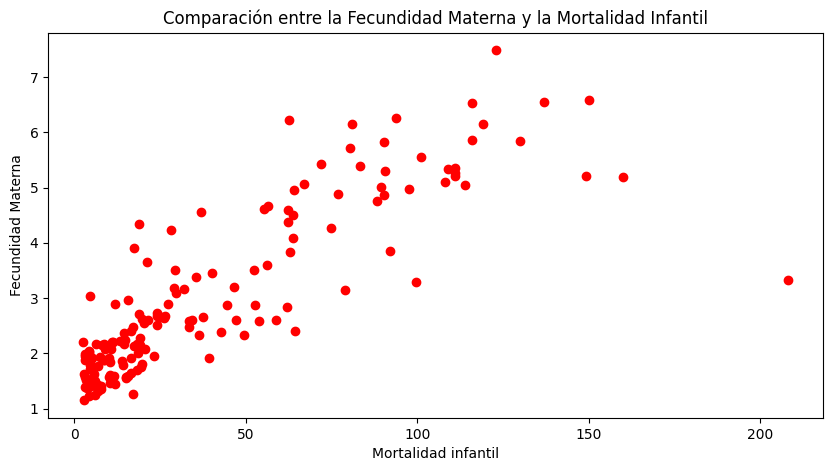

In [11]:
plt.figure(figsize=(10,5))
plt.scatter(df['child_mort'], df['total_fer'], color= 'red')
plt.title('Comparación entre la Fecundidad Materna y la Mortalidad Infantil')
plt.xlabel('Mortalidad infantil')
plt.ylabel('Fecundidad Materna')
plt.show()

In [20]:
#Top 10 paises con mayor mortalidad infantil
paises_mayor_mortalidad_infantil = df.sort_values(by='child_mort', ascending=False)[['country', 'child_mort', 'health']].head(10)
paises_mayor_mortalidad_infantil

,country,child_mort,health
66,Haiti,208.0,6.91
132,Sierra Leone,160.0,13.10
32,Chad,150.0,4.53
31,Central African Republic,149.0,3.98
97,Mali,137.0,4.98
113,Nigeria,130.0,5.07
112,Niger,123.0,5.16
3,Angola,119.0,2.85
25,Burkina Faso,116.0,6.74
37,"Congo, Dem. Rep.",116.0,7.91


In [21]:
#Top 10 paises con mas fecundidad materna
paises_con_mayor_fecundidad_materna = df.sort_values(by='total_fer', ascending=False)[['country','total_fer', 'health']].head(10)
paises_con_mayor_fecundidad_materna

,country,total_fer,health
112,Niger,7.49,5.16
32,Chad,6.59,4.53
97,Mali,6.55,4.98
37,"Congo, Dem. Rep.",6.54,7.91
26,Burundi,6.26,11.60
149,Timor-Leste,6.23,9.12
3,Angola,6.16,2.85
155,Uganda,6.15,9.01
25,Burkina Faso,5.87,6.74
113,Nigeria,5.84,5.07


In [22]:
#Top 10 paises con mayor inflacion
paises_con_mayor_inflacion = df.sort_values(by='inflation', ascending=False)[['country', 'inflation', 'gdpp']].head(10)
paises_con_mayor_inflacion

,country,inflation,gdpp
113,Nigeria,104.0,2330
163,Venezuela,45.9,13500
103,Mongolia,39.2,2650
149,Timor-Leste,26.5,3600
49,Equatorial Guinea,24.9,17100
165,Yemen,23.6,1310
140,Sri Lanka,22.8,2810
3,Angola,22.4,3530
5,Argentina,20.9,10300
37,"Congo, Dem. Rep.",20.8,334


#Comparación entre las exportaciones y las importaciones y como influyen en en PIB
esta comparación la realice debido a que mostraba una correlación anteriormente y puede deberse a muchas cosas, sin embargo la que encuentro más viable es que la mayoria de paises mantienen un equilibrio entre las exportaciones y las exportaciones que realizan, ya que de realizar muchas importaciones y pocas exportaciones el PIB tiende a disminuir.

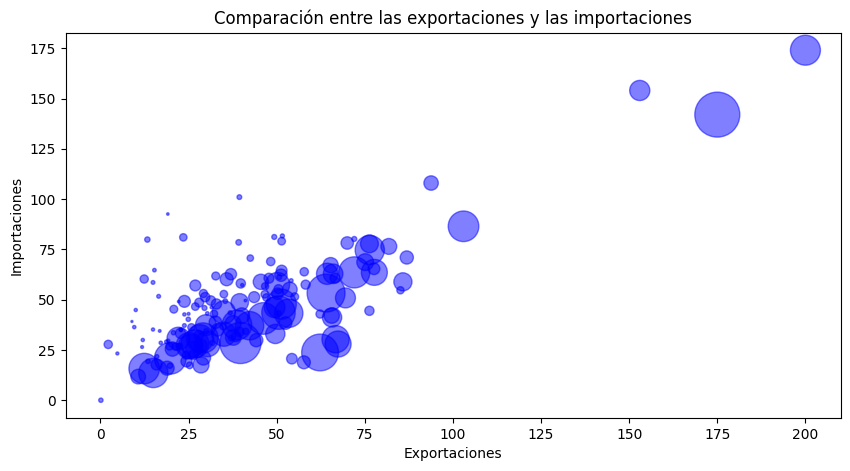

In [30]:
plt.figure(figsize=(10,5))
plt.scatter(df['exports'], df['imports'], color='blue',s=df['gdpp']*0.010, alpha=0.5)
plt.title('Comparación entre las exportaciones y las importaciones')
plt.xlabel('Exportaciones')
plt.ylabel('Importaciones')
plt.show()

In [38]:
#Top 10 paises con las mayores importaciones
paises_con_las_mayores_importaciones =df.sort_values(by='imports', ascending=False)[['country', 'imports','exports', 'income', 'gdpp']].head(10)
paises_con_las_mayores_importaciones

,country,imports,exports,income,gdpp
133,Singapore,174.0,200.0,72100,46600
98,Malta,154.0,153.0,28300,21100
91,Luxembourg,142.0,175.0,91700,105000
131,Seychelles,108.0,93.8,20400,10800
87,Lesotho,101.0,39.4,2380,1170
88,Liberia,92.6,19.1,700,327
73,Ireland,86.5,103.0,45700,48700
83,Kyrgyz Republic,81.7,51.6,2790,880
136,Solomon Islands,81.2,49.3,1780,1290
101,"Micronesia, Fed. Sts.",81.0,23.5,3340,2860


In [40]:
#Top 10 paises con las mayores exportaciones
paises_con_las_mayores_exportaciones = df.sort_values(by='exports', ascending=False)[['country', 'imports','exports', 'income', 'gdpp']].head(10)
paises_con_las_mayores_exportaciones

,country,imports,exports,income,gdpp
133,Singapore,174.0,200.0,72100,46600
91,Luxembourg,142.0,175.0,91700,105000
98,Malta,154.0,153.0,28300,21100
73,Ireland,86.5,103.0,45700,48700
131,Seychelles,108.0,93.8,20400,10800
95,Malaysia,71.0,86.9,21100,9070
49,Equatorial Guinea,58.9,85.8,33700,17100
38,"Congo, Rep.",54.7,85.1,5190,2740
67,Hungary,76.5,81.8,22300,13100
157,United Arab Emirates,63.6,77.7,57600,35000


#Relación entre los ingresos y la expectativa de vida
Como podemos ver tenemos que cuando los ingresos tienden a aumentar, la expectativa de vida tambien desde cierto punto lo hace ademas de que en la grafica notamos tristemente que existe un pais con una expectativa de vida bastante baja, ademas notamos que hay paises donde la expectativa de vida es alta y sus ingresos no lo son tanto, pero notamos que en cuanto la expectativa de vida tiende a llegar a los 75 los ingresos se empiezan a disparar.

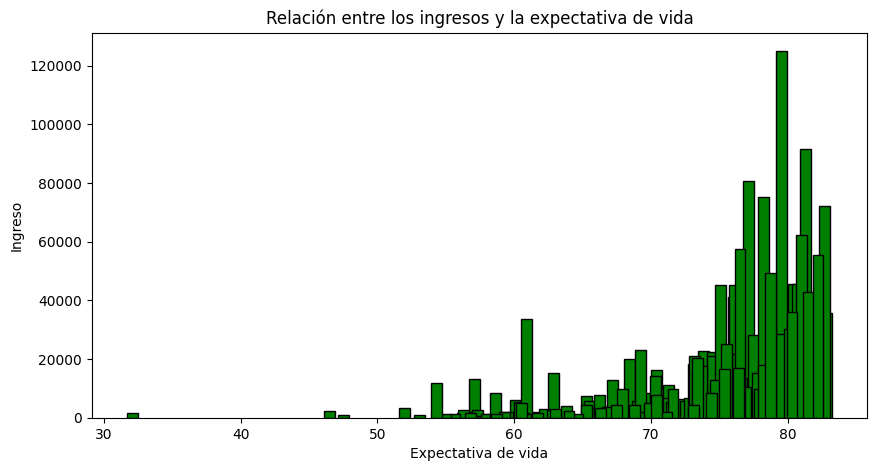

In [41]:
plt.figure(figsize=(10,5))
plt.bar(df['life_expec'],df['income'], color = 'Green',edgecolor='black')
plt.title('Relación entre los ingresos y la expectativa de vida')
plt.xlabel('Expectativa de vida')
plt.ylabel('Ingreso')
plt.show()

In [44]:
#Top 10 paises con expectativa de vida mas baja
paises_con_expectativa_de_vida_mas_baja=df.sort_values(by='life_expec')[['country', 'life_expec','child_mort', 'health', 'gdpp']].head(10)
paises_con_expectativa_de_vida_mas_baja

,country,life_expec,child_mort,health,gdpp
66,Haiti,32.1,208.0,6.91,662
87,Lesotho,46.5,99.7,11.10,1170
31,Central African Republic,47.5,149.0,3.98,446
166,Zambia,52.0,83.1,5.89,1460
94,Malawi,53.1,90.5,6.59,459
137,South Africa,54.3,53.7,8.94,7280
106,Mozambique,54.5,101.0,5.21,419
132,Sierra Leone,55.0,160.0,13.10,399
64,Guinea-Bissau,55.6,114.0,8.50,547
0,Afghanistan,56.2,90.2,7.58,553


In [46]:
#Top 10 paises con los menores ingresos#
paises_con_los_menores_ingresos = df.sort_values(by='income')[['country', 'income','imports','exports', 'gdpp']].head(10)
paises_con_los_menores_ingresos

,country,income,imports,exports,gdpp
37,"Congo, Dem. Rep.",609,49.6,41.10,334
88,Liberia,700,92.6,19.10,327
26,Burundi,764,39.2,8.92,231
112,Niger,814,49.1,22.20,348
31,Central African Republic,888,26.5,11.80,446
106,Mozambique,918,46.2,31.50,419
94,Malawi,1030,34.9,22.80,459
63,Guinea,1190,43.2,30.30,648
150,Togo,1210,57.3,40.20,488
132,Sierra Leone,1220,34.5,16.80,399


In [47]:
#Top 10 paises con expectativa de vida mas alta
paises_con_expectativa_de_vida_mas_alta = df.sort_values(by='life_expec', ascending=False)[['country', 'life_expec','child_mort', 'health', 'gdpp']].head(10)
paises_con_expectativa_de_vida_mas_alta

,country,life_expec,child_mort,health,gdpp
77,Japan,82.8,3.2,9.49,44500
133,Singapore,82.7,2.8,3.96,46600
145,Switzerland,82.2,4.5,11.50,74600
68,Iceland,82.0,2.6,9.40,41900
7,Australia,82.0,4.8,8.73,51900
139,Spain,81.9,3.8,9.54,30700
75,Italy,81.7,4.0,9.53,35800
144,Sweden,81.5,3.0,9.63,52100
74,Israel,81.4,4.6,7.63,30600
54,France,81.4,4.2,11.90,40600


In [50]:
#Top 10 paises con mayores ingresos
paises_con_mayores_ingresos =df.sort_values(by='income', ascending=False)[['country', 'income','imports','exports','health', 'gdpp']].head(10)
paises_con_mayores_ingresos

,country,income,imports,exports,health,gdpp
123,Qatar,125000,23.8,62.3,1.81,70300
91,Luxembourg,91700,142.0,175.0,7.77,105000
23,Brunei,80600,28.0,67.4,2.84,35300
82,Kuwait,75200,30.4,66.7,2.63,38500
133,Singapore,72100,174.0,200.0,3.96,46600
114,Norway,62300,28.5,39.7,9.48,87800
157,United Arab Emirates,57600,63.6,77.7,3.66,35000
145,Switzerland,55500,53.3,64.0,11.50,74600
159,United States,49400,15.8,12.4,17.90,48400
73,Ireland,45700,86.5,103.0,9.19,48700


In [55]:
#Top 10 de paises que invierten más en salud
df['health_spend'] = ((df['health']/100) *df['gdpp'])
paises_que_invierten_más_en_salud = df.sort_values(by='health_spend', ascending=False)[['country', 'health_spend','life_expec','child_mort', 'health', 'gdpp']].head(10)
paises_que_invierten_más_en_salud

,country,health_spend,life_expec,child_mort,health,gdpp
159,United States,8663.60,78.7,7.3,17.90,48400
145,Switzerland,8579.00,82.2,4.5,11.50,74600
114,Norway,8323.44,81.0,3.2,9.48,87800
91,Luxembourg,8158.50,81.3,2.8,7.77,105000
44,Denmark,6612.00,79.5,4.1,11.40,58000
110,Netherlands,5985.70,80.7,4.5,11.90,50300
29,Canada,5356.20,81.3,5.6,11.30,47400
8,Austria,5159.00,80.5,4.3,11.00,46900
144,Sweden,5017.23,81.5,3.0,9.63,52100
58,Germany,4848.80,80.1,4.2,11.60,41800


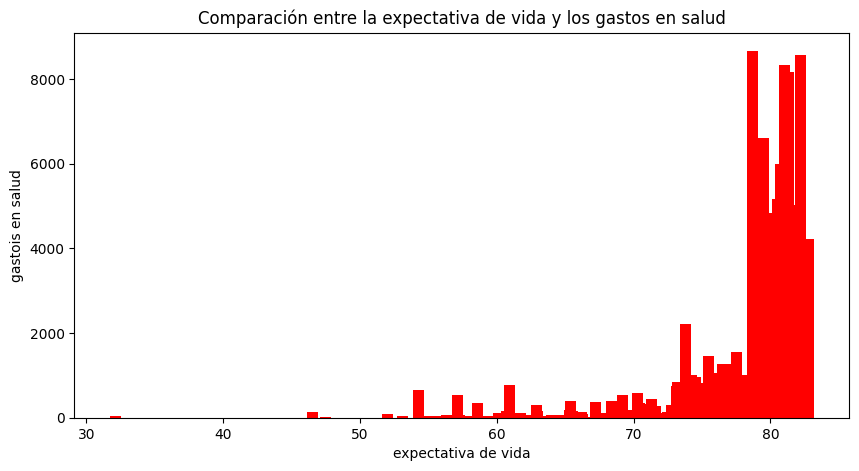

In [61]:
plt.figure(figsize=(10,5))
plt.bar(df['life_expec'], df['health_spend'], color= 'red')
plt.title('Comparación entre la expectativa de vida y los gastos en salud')
plt.xlabel('expectativa de vida')
plt.ylabel('gastois en salud')
plt.show()

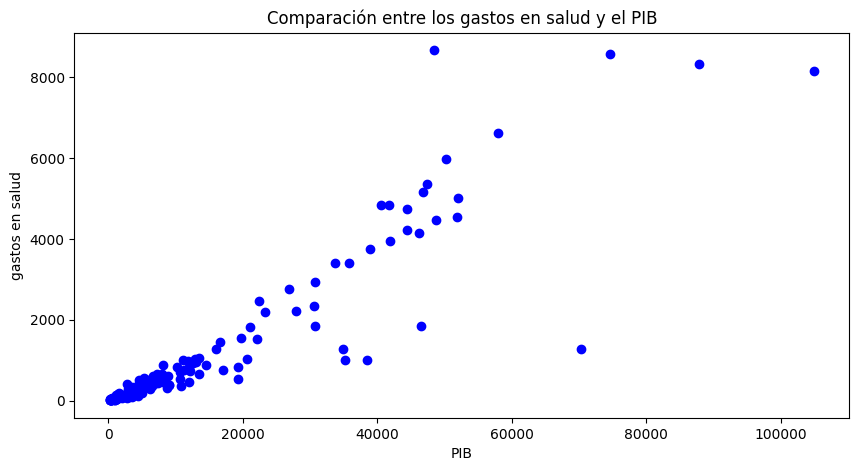

In [68]:
plt.figure(figsize=(10,5))
plt.scatter(df['gdpp'], df['health_spend'], color= 'blue')
plt.title('Comparación entre los gastos en salud y el PIB')
plt.xlabel('PIB')
plt.ylabel('gastos en salud')
plt.show()

In [71]:
#Top 10 paises con mayor gdpp
paises_con_mayor_gdpp = df.sort_values(by='gdpp', ascending=False)[['country', 'income','health_spend','imports','exports','health', 'gdpp']].head(10)
paises_con_mayor_gdpp

,country,income,health_spend,imports,exports,health,gdpp
91,Luxembourg,91700,8158.50,142.0,175.0,7.77,105000
114,Norway,62300,8323.44,28.5,39.7,9.48,87800
145,Switzerland,55500,8579.00,53.3,64.0,11.50,74600
123,Qatar,125000,1272.43,23.8,62.3,1.81,70300
44,Denmark,44000,6612.00,43.6,50.5,11.40,58000
144,Sweden,42900,5017.23,40.7,46.2,9.63,52100
7,Australia,41400,4530.87,20.9,19.8,8.73,51900
110,Netherlands,45500,5985.70,63.6,72.0,11.90,50300
73,Ireland,45700,4475.53,86.5,103.0,9.19,48700
159,United States,49400,8663.60,15.8,12.4,17.90,48400


#Preprocesamos los datos
Esto con el StandardScaler, que adapta y transforma las características numéricas para asegurar que todas tengan una media de 0 y una desviación estándar de 1. Esta preparación de los datos ayuda al modelo a interpretar de manera más precisa la importancia relativa de las diferentes características, mejorando así su rendimiento y eficacia en el proceso de agrupamiento.


In [114]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_num = scaler.fit_transform(df_num)

#Análisis jerárquico de similitud entre países a través de un dendrograma
Este dendrograma de los países es una representación visual de la similitud entre países utilizando un enfoque de análisis jerárquico. En este gráfico, los países se agrupan en función de lo similares que son en términos de sus características y métricas, lo que permite identificar patrones de agrupación y clasificar países en función de su semejanza

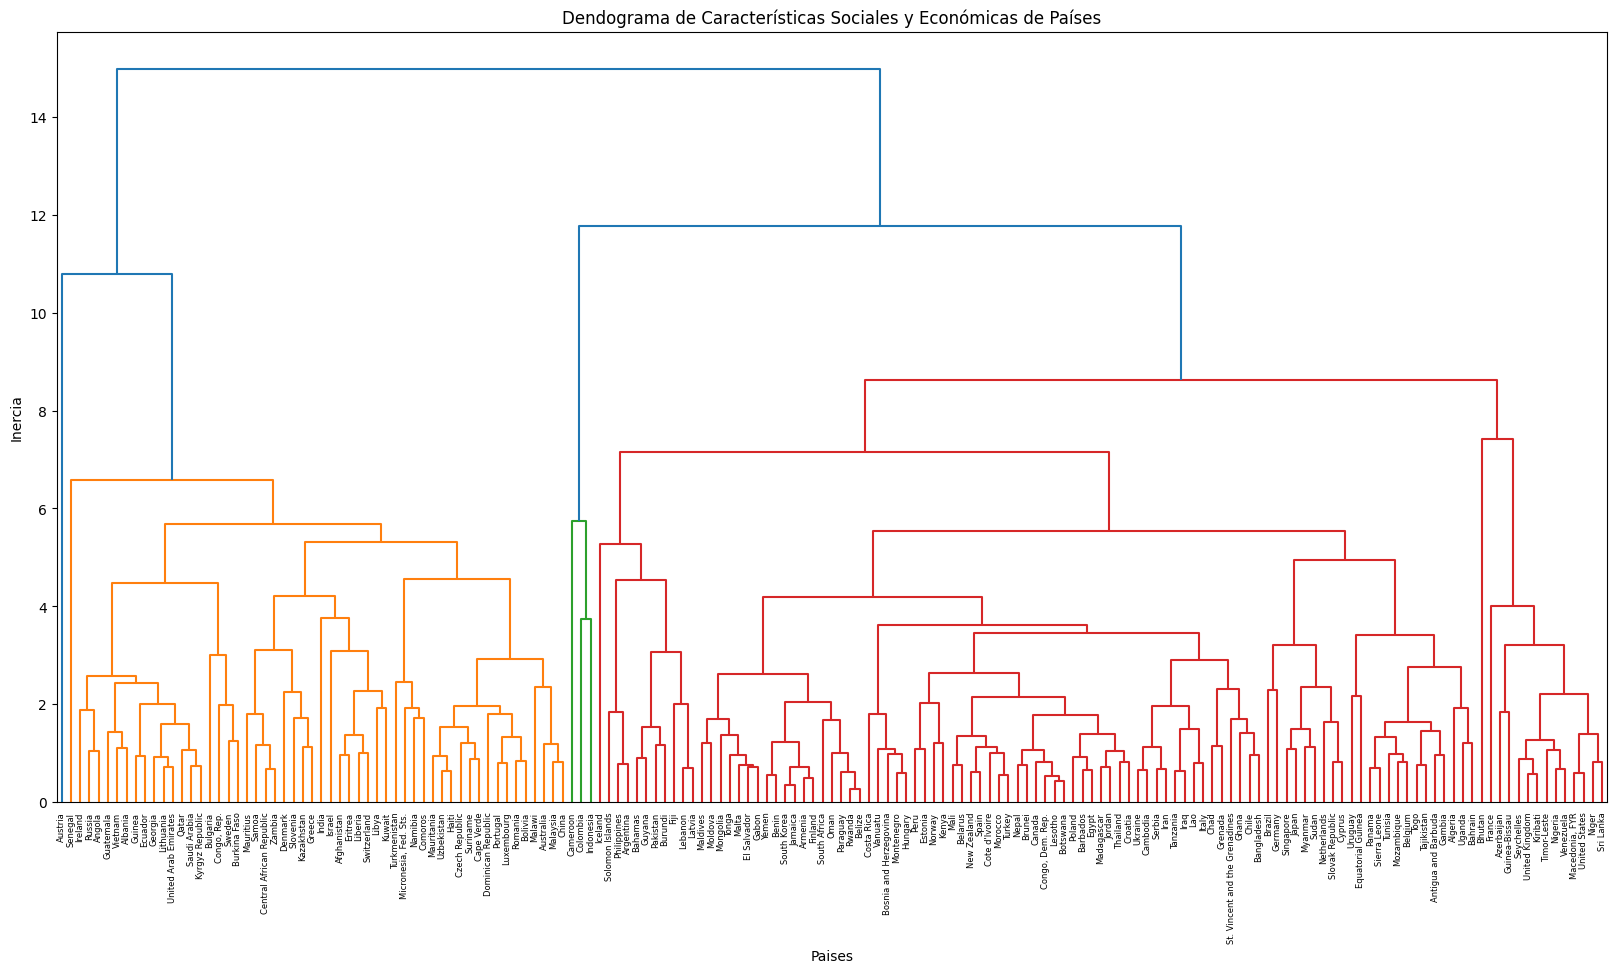

In [115]:
from scipy.cluster.hierarchy import linkage, dendrogram
label = df['country'].value_counts().keys()
plt.figure(figsize=(20,10))
mergings = linkage(df_num, method='complete')
dendrogram(mergings,
           labels= label ,
           leaf_rotation=90,
           leaf_font_size=6
)
plt.title('Dendograma de Características Sociales y Económicas de Países')
plt.xlabel('Paises')
plt.ylabel('Inercia')
plt.show()

#Optimizacion de parametros KMEANS
iteramos sobre el modelo con el objetivo de obtener los mejores resultados de agrupamiento al identificar el número óptimo de clústeres que maximice la cohesión de los datos dentro de cada clúster.

In [116]:
from sklearn.cluster import KMeans
inertia = []

ks = range(1,10)

for k in ks:
  model = KMeans(n_clusters=k)
  model.fit(df_num)
  inertia.append(model.inertia_)
print(inertia)

[1503.0, 1050.2145582853307, 831.4244352086876, 700.5205369722204, 619.9371152246031, 550.4900815621768, 504.75667269564025, 453.01057669989996, 422.626668957802]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

#Análisis del codo para determinar el número óptimo de clústeres en el algoritmo K-means
Con ayuda de los resultados que obtuvimos en la optimización de parametros, evaluamos el numero de clusters y la inercia para ver cual número de clusters nos conviene usar para este dataset.

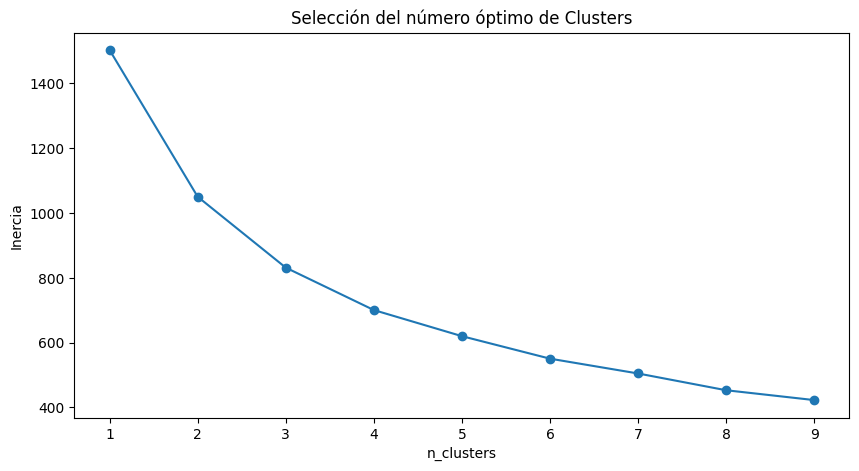

In [117]:
plt.figure(figsize=(10,5))
plt.plot(ks, inertia, '-o')
plt.title('Selección del número óptimo de Clusters')
plt.ylabel('Inercia')
plt.xlabel('n_clusters')
plt.xticks(ks)
plt.show()

In [118]:
  model = KMeans(n_clusters=3)
  model.fit(df_num)
  clusters = model.predict(df_num)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [119]:
df_result = df.copy()
df_result['group'] = clusters

#Resultado de Agrupación
Para finalizar, asignamos a cada país una categoría basada en el agrupamiento realizado mediante el algoritmo K-means. Mostramos a qué categoría pertenece cada país junto con su nombre correspondiente. Este proceso nos permite analizar las causas subyacentes de este agrupamiento, lo cual podría proporcionar insights valiosos sobre similitudes y variaciones entre los países. Es importante tener en cuenta que, al realizar un aprendizaje no supervisado, no contamos con información previa o alguna clasificación establecida que nos permita determinar si el resultado es "bueno" o "malo"La, ya que se trata de un proceso subjetivo...

In [120]:
# Suponiendo que tienes un DataFrame df_result con la columna 'country' para los nombres de los países y la columna 'group' para los clústeres asignados.

# Crear una lista de listas que contenga los países agrupados por clústeres
clustered_countries = [df_result[df_result['group'] == i]['country'].tolist() for i in range(3)]  # Reemplaza 'n' con el número total de clústeres

# Imprimir las listas horizontalmente
for num,cluster in enumerate(clustered_countries):
    print(num,cluster)

0 ['Afghanistan', 'Angola', 'Benin', 'Botswana', 'Burkina Faso', 'Burundi', 'Cameroon', 'Central African Republic', 'Chad', 'Comoros', 'Congo, Dem. Rep.', 'Congo, Rep.', "Cote d'Ivoire", 'Equatorial Guinea', 'Eritrea', 'Gabon', 'Gambia', 'Ghana', 'Guinea', 'Guinea-Bissau', 'Haiti', 'Iraq', 'Kenya', 'Kiribati', 'Lao', 'Lesotho', 'Liberia', 'Madagascar', 'Malawi', 'Mali', 'Mauritania', 'Mozambique', 'Namibia', 'Niger', 'Nigeria', 'Pakistan', 'Rwanda', 'Senegal', 'Sierra Leone', 'South Africa', 'Sudan', 'Tanzania', 'Timor-Leste', 'Togo', 'Uganda', 'Yemen', 'Zambia']
1 ['Australia', 'Austria', 'Bahrain', 'Belgium', 'Brunei', 'Canada', 'Cyprus', 'Czech Republic', 'Denmark', 'Finland', 'France', 'Germany', 'Greece', 'Iceland', 'Ireland', 'Israel', 'Italy', 'Japan', 'Kuwait', 'Luxembourg', 'Malta', 'Netherlands', 'New Zealand', 'Norway', 'Portugal', 'Qatar', 'Singapore', 'Slovak Republic', 'Slovenia', 'South Korea', 'Spain', 'Sweden', 'Switzerland', 'United Arab Emirates', 'United Kingdom', '